# 1. Data Analysis

In [3]:
# data analysis path
database_path = 'prosusai_assignment_data/5k_items_curated.csv'
query_path = 'prosusai_assignment_data/queries.csv'

Loading data...
Dataset shape: (5000, 5)
Columns: ['_id', 'itemId', 'itemMetadata', 'itemProfile', 'merchantId']

First few rows:
                        _id                                itemId  \
0  6813b2b5b7476b2ec454b7ff  442731c2-144b-4c5c-b81e-e0cf9dfa9630   
1  6813b2b5b7476b2ec454b800  4a6d4a8f-c1bf-4457-a448-4a3b5e1eb20c   
2  6813b2b5b7476b2ec454b801  5380e263-c202-45cf-8eae-81e54573f122   
3  6813b2b5b7476b2ec454b802  595ce305-ddf5-49fc-9a8c-b50a9ccf6267   
4  6813b2b5b7476b2ec454b803  5e2db3a9-1a2c-4462-8aa1-1ed045122e12   

                                        itemMetadata  \
0  {"category_name":"Alimentos Básicos","descript...   
1  {"category_name":"Doces e Sobremesas","descrip...   
2  {"category_name":"Higiene e Cuidados Pessoais"...   
3  {"category_name":"Higiene e Cuidados Pessoais"...   
4  {"category_name":"Pet Shop","description":"• R...   

                                         itemProfile  \
0  {"metrics":{"avgBasketPrice":159.89,"coPurchas...   
1  {"m

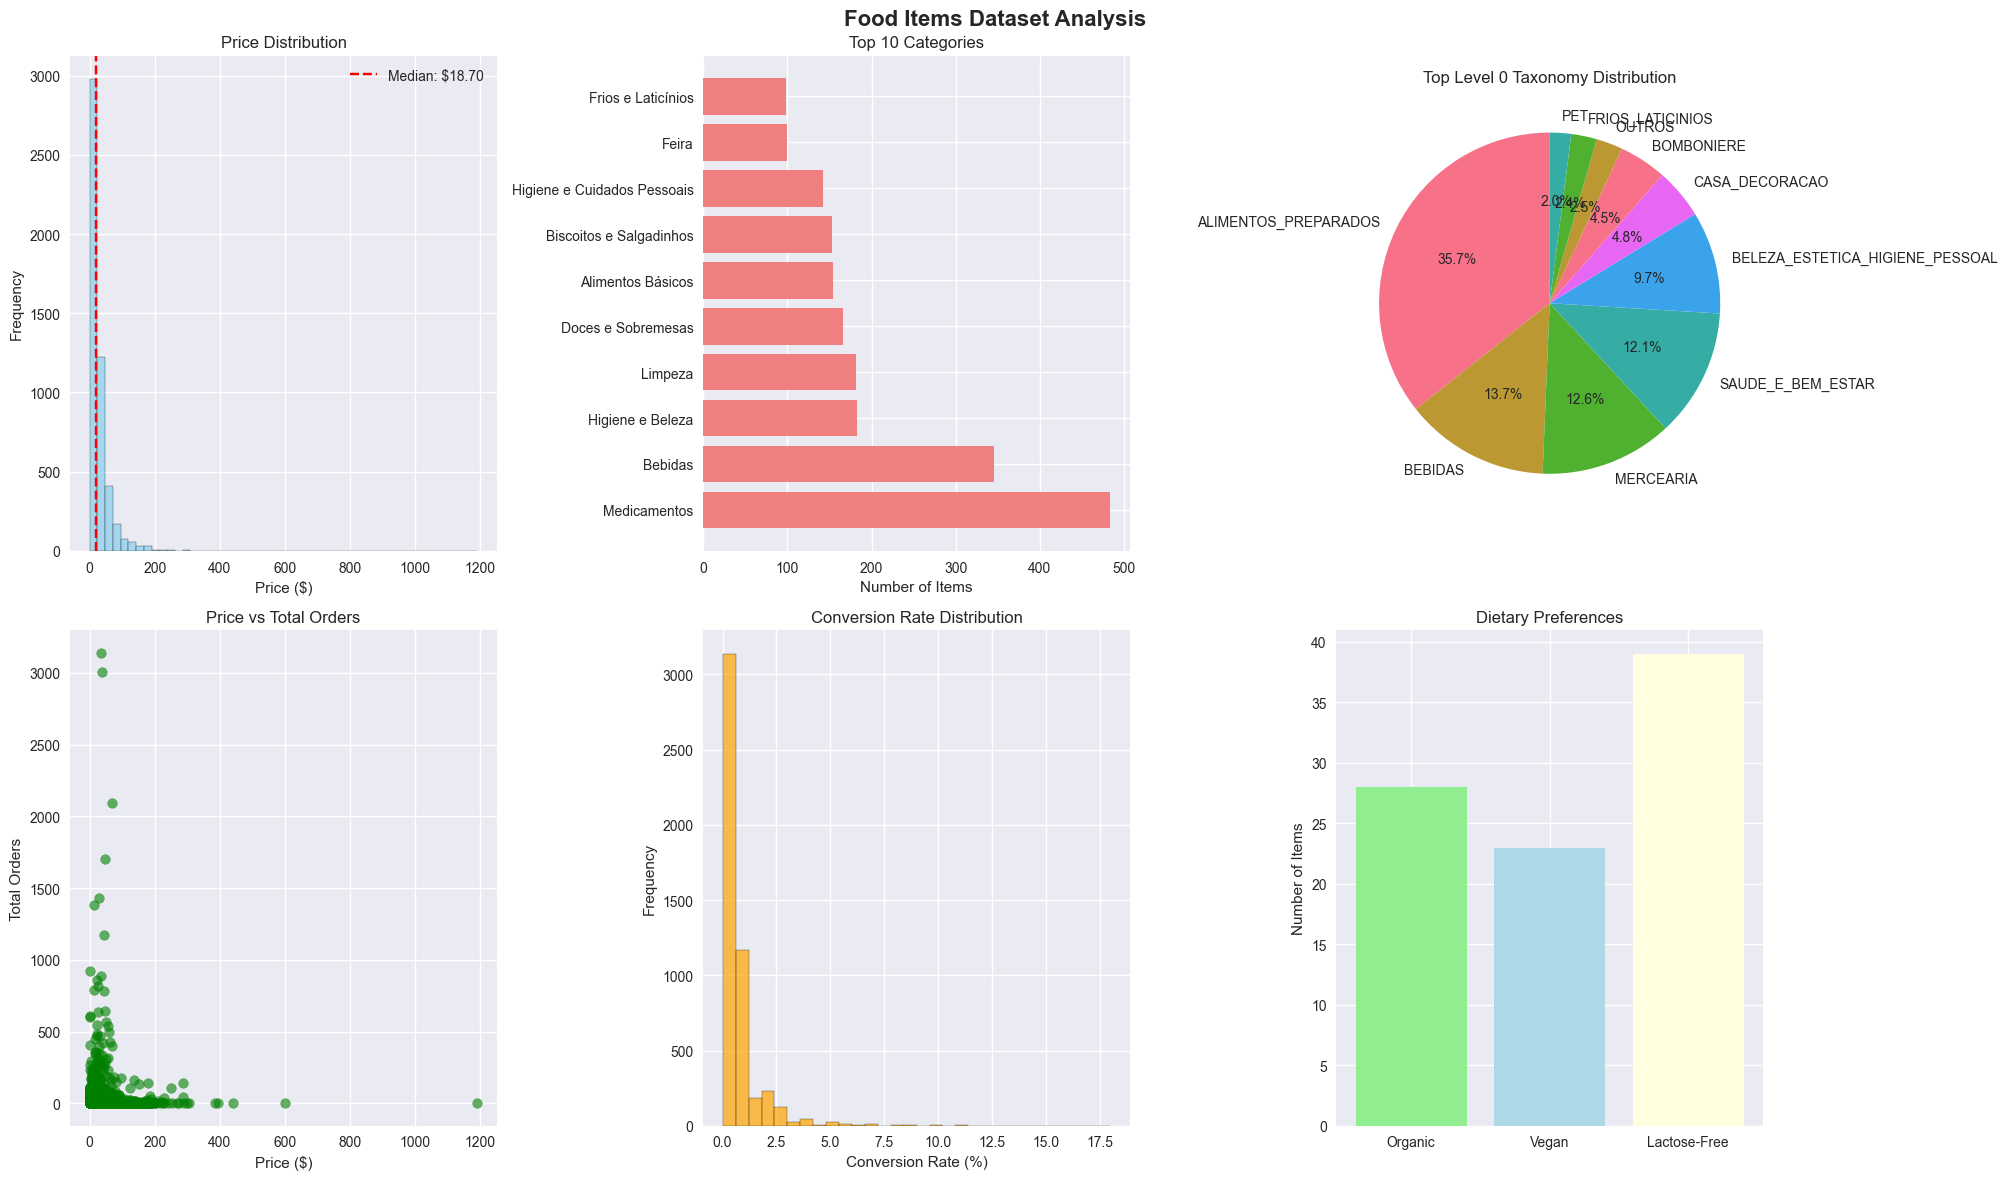


TEXT ANALYSIS
Average name length: 37.3 characters
Shortest name: 'N3'
Longest name: 'Nasoar Infantil 0,9%, Myralis Caixa com 1 Frasco com 120ml de Solução de Uso Nasal + 15 Sachês com 1,080g de Granulados para Solução Nasal'
Items with descriptions: 4144 (82.9%)

MERCHANT ANALYSIS
Top 10 merchants by item count:
merchantId
f91fa0ce-57d6-4a3d-95be-79ef1ab71f23    73
5c029092-0209-4fa1-9486-7972485fb0a3    64
34699e89-d453-4b2f-b404-c5ab553424d1    62
b0cdddd3-8412-45a9-8560-6fc3e05eaba7    60
d6cf7b73-c9bb-4c8a-abd6-c1a832bdd461    59
02de5bbf-2990-4b4b-bd04-9a334e239489    57
612242a0-dd8d-42c3-a160-d959e53ad244    56
f8ae7171-7492-454c-a95c-3f86382bd00a    56
05d58c04-6f07-484c-b035-c989f4caa758    54
9b705fbc-8e9a-4e88-9ba1-baa2fc570d17    52
Name: count, dtype: int64

Merchant with most items: f91fa0ce-57d6-4a3d-95be-79ef1ab71f23 (73 items)
Merchant with least items: bfa14265-d762-4d1f-a376-0f03e8212114 (1 items)

SEARCH TERMS ANALYSIS
Top 20 search terms:
  açaí: 184
  pizza: 166

In [ ]:
# Import necessary libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the data
print("Loading data...")
df = pd.read_csv(database_path)

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())

# Function to safely parse JSON strings
def safe_json_parse(json_str):
    try:
        return json.loads(json_str)
    except:
        return {}

# Parse JSON columns
print("\nParsing JSON columns...")
df['itemMetadata_parsed'] = df['itemMetadata'].apply(safe_json_parse)
df['itemProfile_parsed'] = df['itemProfile'].apply(safe_json_parse)

# Extract key fields from itemMetadata
df['name'] = df['itemMetadata_parsed'].apply(lambda x: x.get('name', ''))
df['category'] = df['itemMetadata_parsed'].apply(lambda x: x.get('category_name', ''))
df['description'] = df['itemMetadata_parsed'].apply(lambda x: x.get('description', ''))
df['price'] = df['itemMetadata_parsed'].apply(lambda x: x.get('price', np.nan))
df['organic'] = df['itemMetadata_parsed'].apply(lambda x: x.get('organic', False))
df['vegan'] = df['itemMetadata_parsed'].apply(lambda x: x.get('vegan', False))
df['lacFree'] = df['itemMetadata_parsed'].apply(lambda x: x.get('lacFree', False))

# Extract taxonomy levels
df['taxonomy_l0'] = df['itemMetadata_parsed'].apply(lambda x: x.get('taxonomy', {}).get('l0', ''))
df['taxonomy_l1'] = df['itemMetadata_parsed'].apply(lambda x: x.get('taxonomy', {}).get('l1', ''))
df['taxonomy_l2'] = df['itemMetadata_parsed'].apply(lambda x: x.get('taxonomy', {}).get('l2', ''))

# Extract metrics from itemProfile
df['total_orders'] = df['itemProfile_parsed'].apply(lambda x: x.get('metrics', {}).get('total_orders', 0))
df['conversion_rate'] = df['itemProfile_parsed'].apply(lambda x: x.get('metrics', {}).get('conversionRate', 0))
df['avg_basket_price'] = df['itemProfile_parsed'].apply(lambda x: x.get('metrics', {}).get('avgBasketPrice', 0))
df['delivery_time'] = df['itemProfile_parsed'].apply(lambda x: x.get('metrics', {}).get('deliveryTime', 0))
df['preparation_time'] = df['itemProfile_parsed'].apply(lambda x: x.get('metrics', {}).get('preparationTime', 0))

# Basic statistics
print("\n" + "="*50)
print("BASIC STATISTICS")
print("="*50)

print(f"Total items: {len(df)}")
print(f"Unique merchants: {df['merchantId'].nunique()}")
print(f"Price range: ${df['price'].min():.2f} - ${df['price'].max():.2f}")
print(f"Average price: ${df['price'].mean():.2f}")
print(f"Median price: ${df['price'].median():.2f}")

# Category analysis
print("\n" + "="*50)
print("CATEGORY ANALYSIS")
print("="*50)

category_counts = df['category'].value_counts()
print("Top 15 categories:")
print(category_counts.head(15))

# Taxonomy analysis
print("\n" + "="*50)
print("TAXONOMY ANALYSIS")
print("="*50)

print("Top Level 0 categories:")
print(df['taxonomy_l0'].value_counts().head(10))

print("\nTop Level 1 categories:")
print(df['taxonomy_l1'].value_counts().head(10))

print("\nTop Level 2 categories:")
print(df['taxonomy_l2'].value_counts().head(10))

# Dietary preferences analysis
print("\n" + "="*50)
print("DIETARY PREFERENCES")
print("="*50)

print(f"Organic items: {df['organic'].sum()} ({df['organic'].mean()*100:.1f}%)")
print(f"Vegan items: {df['vegan'].sum()} ({df['vegan'].mean()*100:.1f}%)")
print(f"Lactose-free items: {df['lacFree'].sum()} ({df['lacFree'].mean()*100:.1f}%)")

# Performance metrics analysis
print("\n" + "="*50)
print("PERFORMANCE METRICS")
print("="*50)

print(f"Items with orders: {len(df[df['total_orders'] > 0])}")
print(f"Average conversion rate: {df['conversion_rate'].mean():.2f}%")
print(f"Average basket price: ${df['avg_basket_price'].mean():.2f}")
print(f"Average delivery time: {df['delivery_time'].mean():.1f} minutes")
print(f"Average preparation time: {df['preparation_time'].mean():.1f} minutes")

# Price distribution analysis
print("\n" + "="*50)
print("PRICE DISTRIBUTION")
print("="*50)

price_quartiles = df['price'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("Price quartiles:")
for q, price in price_quartiles.items():
    print(f"  {q*100:.0f}th percentile: ${price:.2f}")

# Create visualizations
print("\n" + "="*50)
print("CREATING VISUALIZATIONS")
print("="*50)

# Set up the plotting area
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Food Items Dataset Analysis', fontsize=16, fontweight='bold')

# 1. Price distribution
axes[0,0].hist(df['price'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Price Distribution')
axes[0,0].set_xlabel('Price ($)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(df['price'].median(), color='red', linestyle='--', label=f'Median: ${df["price"].median():.2f}')
axes[0,0].legend()

# 2. Top categories
top_categories = category_counts.head(10)
axes[0,1].barh(range(len(top_categories)), top_categories.values, color='lightcoral')
axes[0,1].set_yticks(range(len(top_categories)))
axes[0,1].set_yticklabels(top_categories.index)
axes[0,1].set_title('Top 10 Categories')
axes[0,1].set_xlabel('Number of Items')

# 3. Taxonomy level 0 distribution
top_taxonomy = df['taxonomy_l0'].value_counts().head(10)
axes[0,2].pie(top_taxonomy.values, labels=top_taxonomy.index, autopct='%1.1f%%', startangle=90)
axes[0,2].set_title('Top Level 0 Taxonomy Distribution')

# 4. Price vs Orders scatter
valid_data = df[(df['price'].notna()) & (df['total_orders'] > 0)]
axes[1,0].scatter(valid_data['price'], valid_data['total_orders'], alpha=0.6, color='green')
axes[1,0].set_title('Price vs Total Orders')
axes[1,0].set_xlabel('Price ($)')
axes[1,0].set_ylabel('Total Orders')

# 5. Conversion rate distribution
valid_conversion = df[df['conversion_rate'] > 0]['conversion_rate']
axes[1,1].hist(valid_conversion, bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1,1].set_title('Conversion Rate Distribution')
axes[1,1].set_xlabel('Conversion Rate (%)')
axes[1,1].set_ylabel('Frequency')

# 6. Dietary preferences
dietary_data = [df['organic'].sum(), df['vegan'].sum(), df['lacFree'].sum()]
dietary_labels = ['Organic', 'Vegan', 'Lactose-Free']
axes[1,2].bar(dietary_labels, dietary_data, color=['lightgreen', 'lightblue', 'lightyellow'])
axes[1,2].set_title('Dietary Preferences')
axes[1,2].set_ylabel('Number of Items')

plt.tight_layout()
plt.show()

# Additional analysis: Text analysis
print("\n" + "="*50)
print("TEXT ANALYSIS")
print("="*50)

# Name length analysis
df['name_length'] = df['name'].str.len()
print(f"Average name length: {df['name_length'].mean():.1f} characters")
print(f"Shortest name: '{df.loc[df['name_length'].idxmin(), 'name']}'")
print(f"Longest name: '{df.loc[df['name_length'].idxmax(), 'name']}'")

# Description analysis
df['has_description'] = df['description'].str.len() > 0
print(f"Items with descriptions: {df['has_description'].sum()} ({df['has_description'].mean()*100:.1f}%)")

# Merchant analysis
print("\n" + "="*50)
print("MERCHANT ANALYSIS")
print("="*50)

merchant_counts = df['merchantId'].value_counts()
print(f"Top 10 merchants by item count:")
print(merchant_counts.head(10))

print(f"\nMerchant with most items: {merchant_counts.index[0]} ({merchant_counts.iloc[0]} items)")
print(f"Merchant with least items: {merchant_counts.index[-1]} ({merchant_counts.iloc[-1]} items)")

# Search terms analysis
print("\n" + "="*50)
print("SEARCH TERMS ANALYSIS")
print("="*50)

# Extract search terms from itemProfile
search_terms = []
for profile in df['itemProfile_parsed']:
    if 'search' in profile:
        for search_item in profile['search']:
            if 'term' in search_item:
                search_terms.append(search_item['term'])

if search_terms:
    search_counter = Counter(search_terms)
    print("Top 20 search terms:")
    for term, count in search_counter.most_common(20):
        print(f"  {term}: {count}")
else:
    print("No search terms found in the data")

# Summary statistics
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)

summary_stats = {
    'Total Items': len(df),
    'Unique Merchants': df['merchantId'].nunique(),
    'Categories': df['category'].nunique(),
    'Price Range': f"${df['price'].min():.2f} - ${df['price'].max():.2f}",
    'Avg Price': f"${df['price'].mean():.2f}",
    'Organic Items': f"{df['organic'].sum()} ({df['organic'].mean()*100:.1f}%)",
    'Vegan Items': f"{df['vegan'].sum()} ({df['vegan'].mean()*100:.1f}%)",
    'Items with Orders': len(df[df['total_orders'] > 0]),
    'Avg Conversion Rate': f"{df['conversion_rate'].mean():.2f}%"
}

for key, value in summary_stats.items():
    print(f"{key}: {value}")

print("\nData analysis completed!")


TOTAL NUMBER OF CATEGORIES: 1339

DETAILED BREAKDOWN BY CATEGORY:
Category                                 Count      Percentage
Medicamentos                             483        9.7%
Bebidas                                  346        6.9%
Higiene e Beleza                         183        3.7%
Limpeza                                  181        3.6%
Doces e Sobremesas                       166        3.3%
Alimentos Básicos                        154        3.1%
Biscoitos e Salgadinhos                  153        3.1%
Higiene e Cuidados Pessoais              142        2.8%
Feira                                    99         2.0%
Frios e Laticínios                       98         2.0%
Matinais                                 95         1.9%
Carnes, Aves e Peixes                    90         1.8%
Molhos, Condimentos e Conservas          84         1.7%
Bebidas Alcoólicas                       78         1.6%
Mamãe e Bebê                             74         1.5%
Cuidados com o 

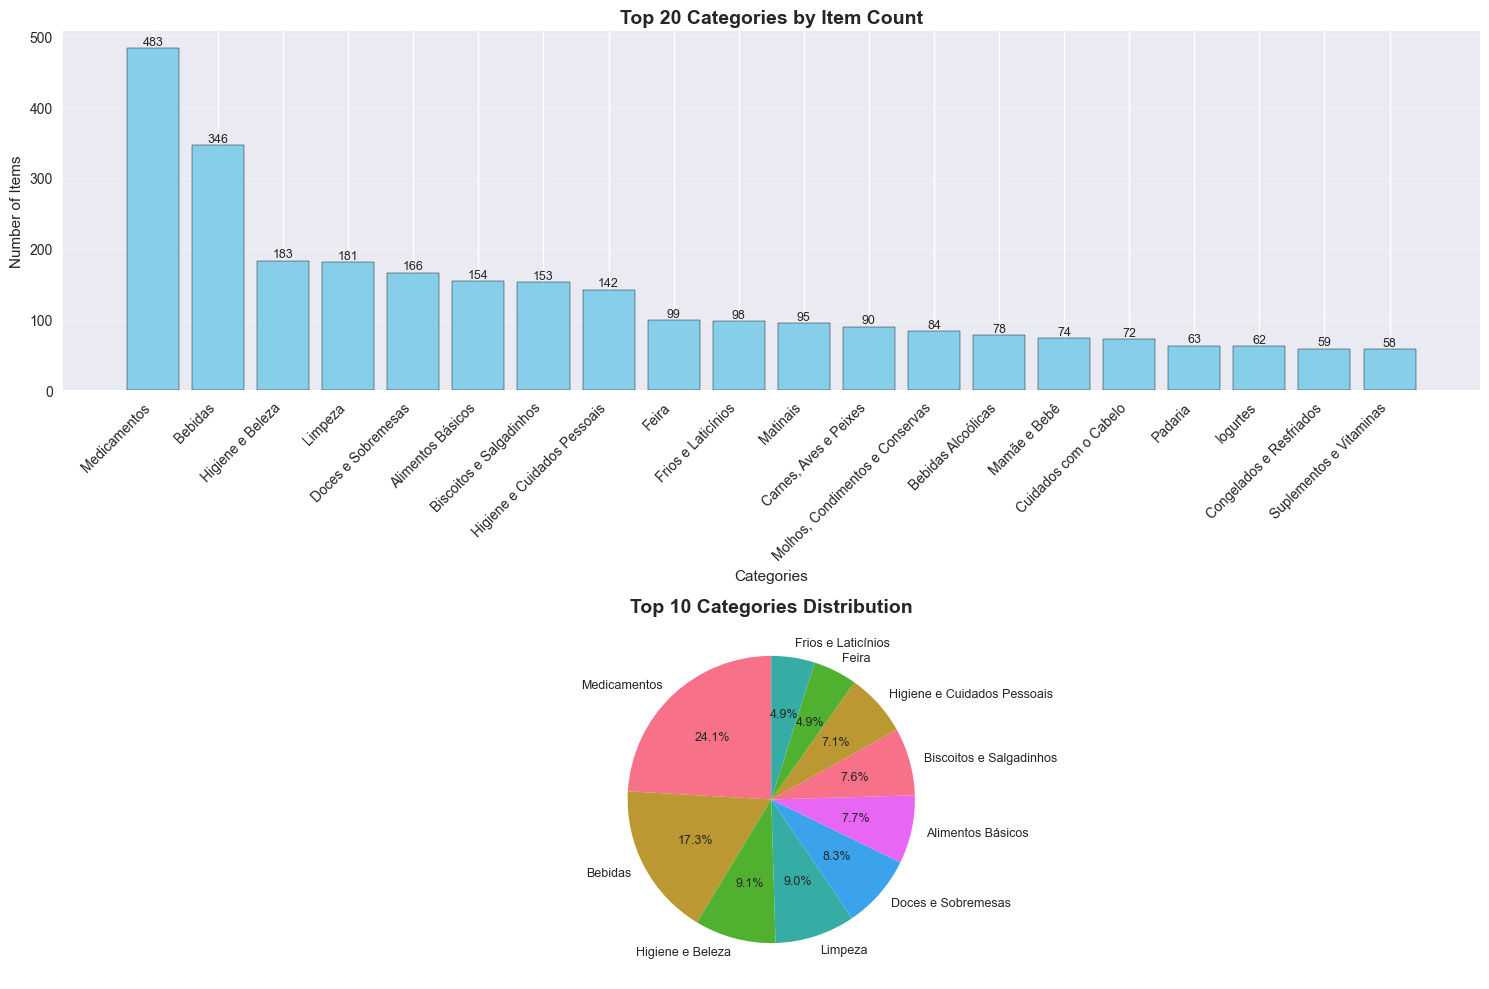


CATEGORY SIZE DISTRIBUTION:
Categories with ≤10 items: 1299
Categories with 11-50 items: 18
Categories with 51-100 items: 14
Categories with >100 items: 8

Categories with only 1 item:
  - Saborosos Minis Salgados Assados
  - Tabacaria
  - Sobre o Instinto Burger
  - Pães italianos recheados - grandes
  - Hambúrgueres Sensacionais
  - Milk Shakes | Cafés Gelados e Sorvetes
  - Refrigerante lata 350ml
  - Pizza Do Dia
  - * As 10 Opções de Todos os Dias*
  - Saladas e Cachorro Quente no Prato
  - Combos!
  - Os mais Pedidos !!!
  - Desativado - Nao usar
  - Bife Acebolado
  - Sushis - Trio
  - Açais da casa
  - Sorvetes Light Sergel
  - Combos Família
  - Crepe No Cone
  - Pasteis Deliciosos!
  - Novidades da Mone
  - Papéis
  - Promoção Do Dia
  - Bolos Recheados | Bolo de Aniversário
  - Tapiocas doces 19cm (140g a 200g)
  - Porções/ Acompanhamentos
  - Pães 380
  - Pratos Executivos Especiais
  - Pastéis Salgados De 20 Cm
  - Nhoques
  - Combo Sorvetes 1,5 Litros  + casquinha
  - **

In [4]:
df = pd.read_csv(database_path)
df['itemMetadata_parsed'] = df['itemMetadata'].apply(safe_json_parse)

# Extract category field
df['category'] = df['itemMetadata_parsed'].apply(lambda x: x.get('category_name', ''))

# Count total categories
total_categories = df['category'].nunique()
print(f"\n{'='*60}")
print(f"TOTAL NUMBER OF CATEGORIES: {total_categories}")
print(f"{'='*60}")

# Count items per category
category_counts = df['category'].value_counts()

print(f"\nDETAILED BREAKDOWN BY CATEGORY:")
print(f"{'='*60}")
print(f"{'Category':<40} {'Count':<10} {'Percentage':<10}")
print(f"{'='*60}")

for category, count in category_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{category:<40} {count:<10} {percentage:.1f}%")

print(f"\n{'='*60}")
print(f"SUMMARY:")
print(f"{'='*60}")
print(f"Total items: {len(df)}")
print(f"Total categories: {total_categories}")
print(f"Average items per category: {len(df) / total_categories:.1f}")
print(f"Category with most items: '{category_counts.index[0]}' ({category_counts.iloc[0]} items)")
print(f"Category with least items: '{category_counts.index[-1]}' ({category_counts.iloc[-1]} items)")

# Create visualization
plt.figure(figsize=(15, 10))

# Bar chart of top 20 categories
top_20_categories = category_counts.head(20)
plt.subplot(2, 1, 1)
bars = plt.bar(range(len(top_20_categories)), top_20_categories.values, color='skyblue', edgecolor='black')
plt.title('Top 20 Categories by Item Count', fontsize=14, fontweight='bold')
plt.xlabel('Categories')
plt.ylabel('Number of Items')
plt.xticks(range(len(top_20_categories)), top_20_categories.index, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Pie chart of top 10 categories
plt.subplot(2, 1, 2)
top_10_categories = category_counts.head(10)
plt.pie(top_10_categories.values, labels=top_10_categories.index, autopct='%1.1f%%', 
        startangle=90, textprops={'fontsize': 9})
plt.title('Top 10 Categories Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Additional analysis: Category size distribution
print(f"\n{'='*60}")
print(f"CATEGORY SIZE DISTRIBUTION:")
print(f"{'='*60}")

# Group categories by size
small_categories = len(category_counts[category_counts <= 10])
medium_categories = len(category_counts[(category_counts > 10) & (category_counts <= 50)])
large_categories = len(category_counts[(category_counts > 50) & (category_counts <= 100)])
very_large_categories = len(category_counts[category_counts > 100])

print(f"Categories with ≤10 items: {small_categories}")
print(f"Categories with 11-50 items: {medium_categories}")
print(f"Categories with 51-100 items: {large_categories}")
print(f"Categories with >100 items: {very_large_categories}")

# Show categories with very few items
print(f"\nCategories with only 1 item:")
single_item_categories = category_counts[category_counts == 1]
for category in single_item_categories.index:
    print(f"  - {category}")

print(f"\nCategories with only 2 items:")
two_item_categories = category_counts[category_counts == 2]
for category in two_item_categories.index:
    print(f"  - {category}")


TAXONOMY ANALYSIS
Total items: 5000
Items with L0 taxonomy: 5000
Items with L1 taxonomy: 5000
Items with L2 taxonomy: 5000

LEVEL 0 (L0) TAXONOMY ANALYSIS
Total L0 categories: 18

Top 15 L0 categories:
Category                       Count      Percentage
ALIMENTOS_PREPARADOS           1707       34.1%
BEBIDAS                        655        13.1%
MERCEARIA                      601        12.0%
SAUDE_E_BEM_ESTAR              581        11.6%
BELEZA_ESTETICA_HIGIENE_PESSOAL 465        9.3%
CASA_DECORACAO                 228        4.6%
BOMBONIERE                     217        4.3%
OUTROS                         120        2.4%
FRIOS_LATICINIOS               116        2.3%
PET                            97         1.9%
FLV                            97         1.9%
BEBE                           76         1.5%
ELETRO_E_ELETRONICOS           18         0.4%
JOGOS_BRINQUEDOS               7          0.1%
PAPELARIA_LIVRARIA             6          0.1%

LEVEL 1 (L1) TAXONOMY ANALYSIS
To

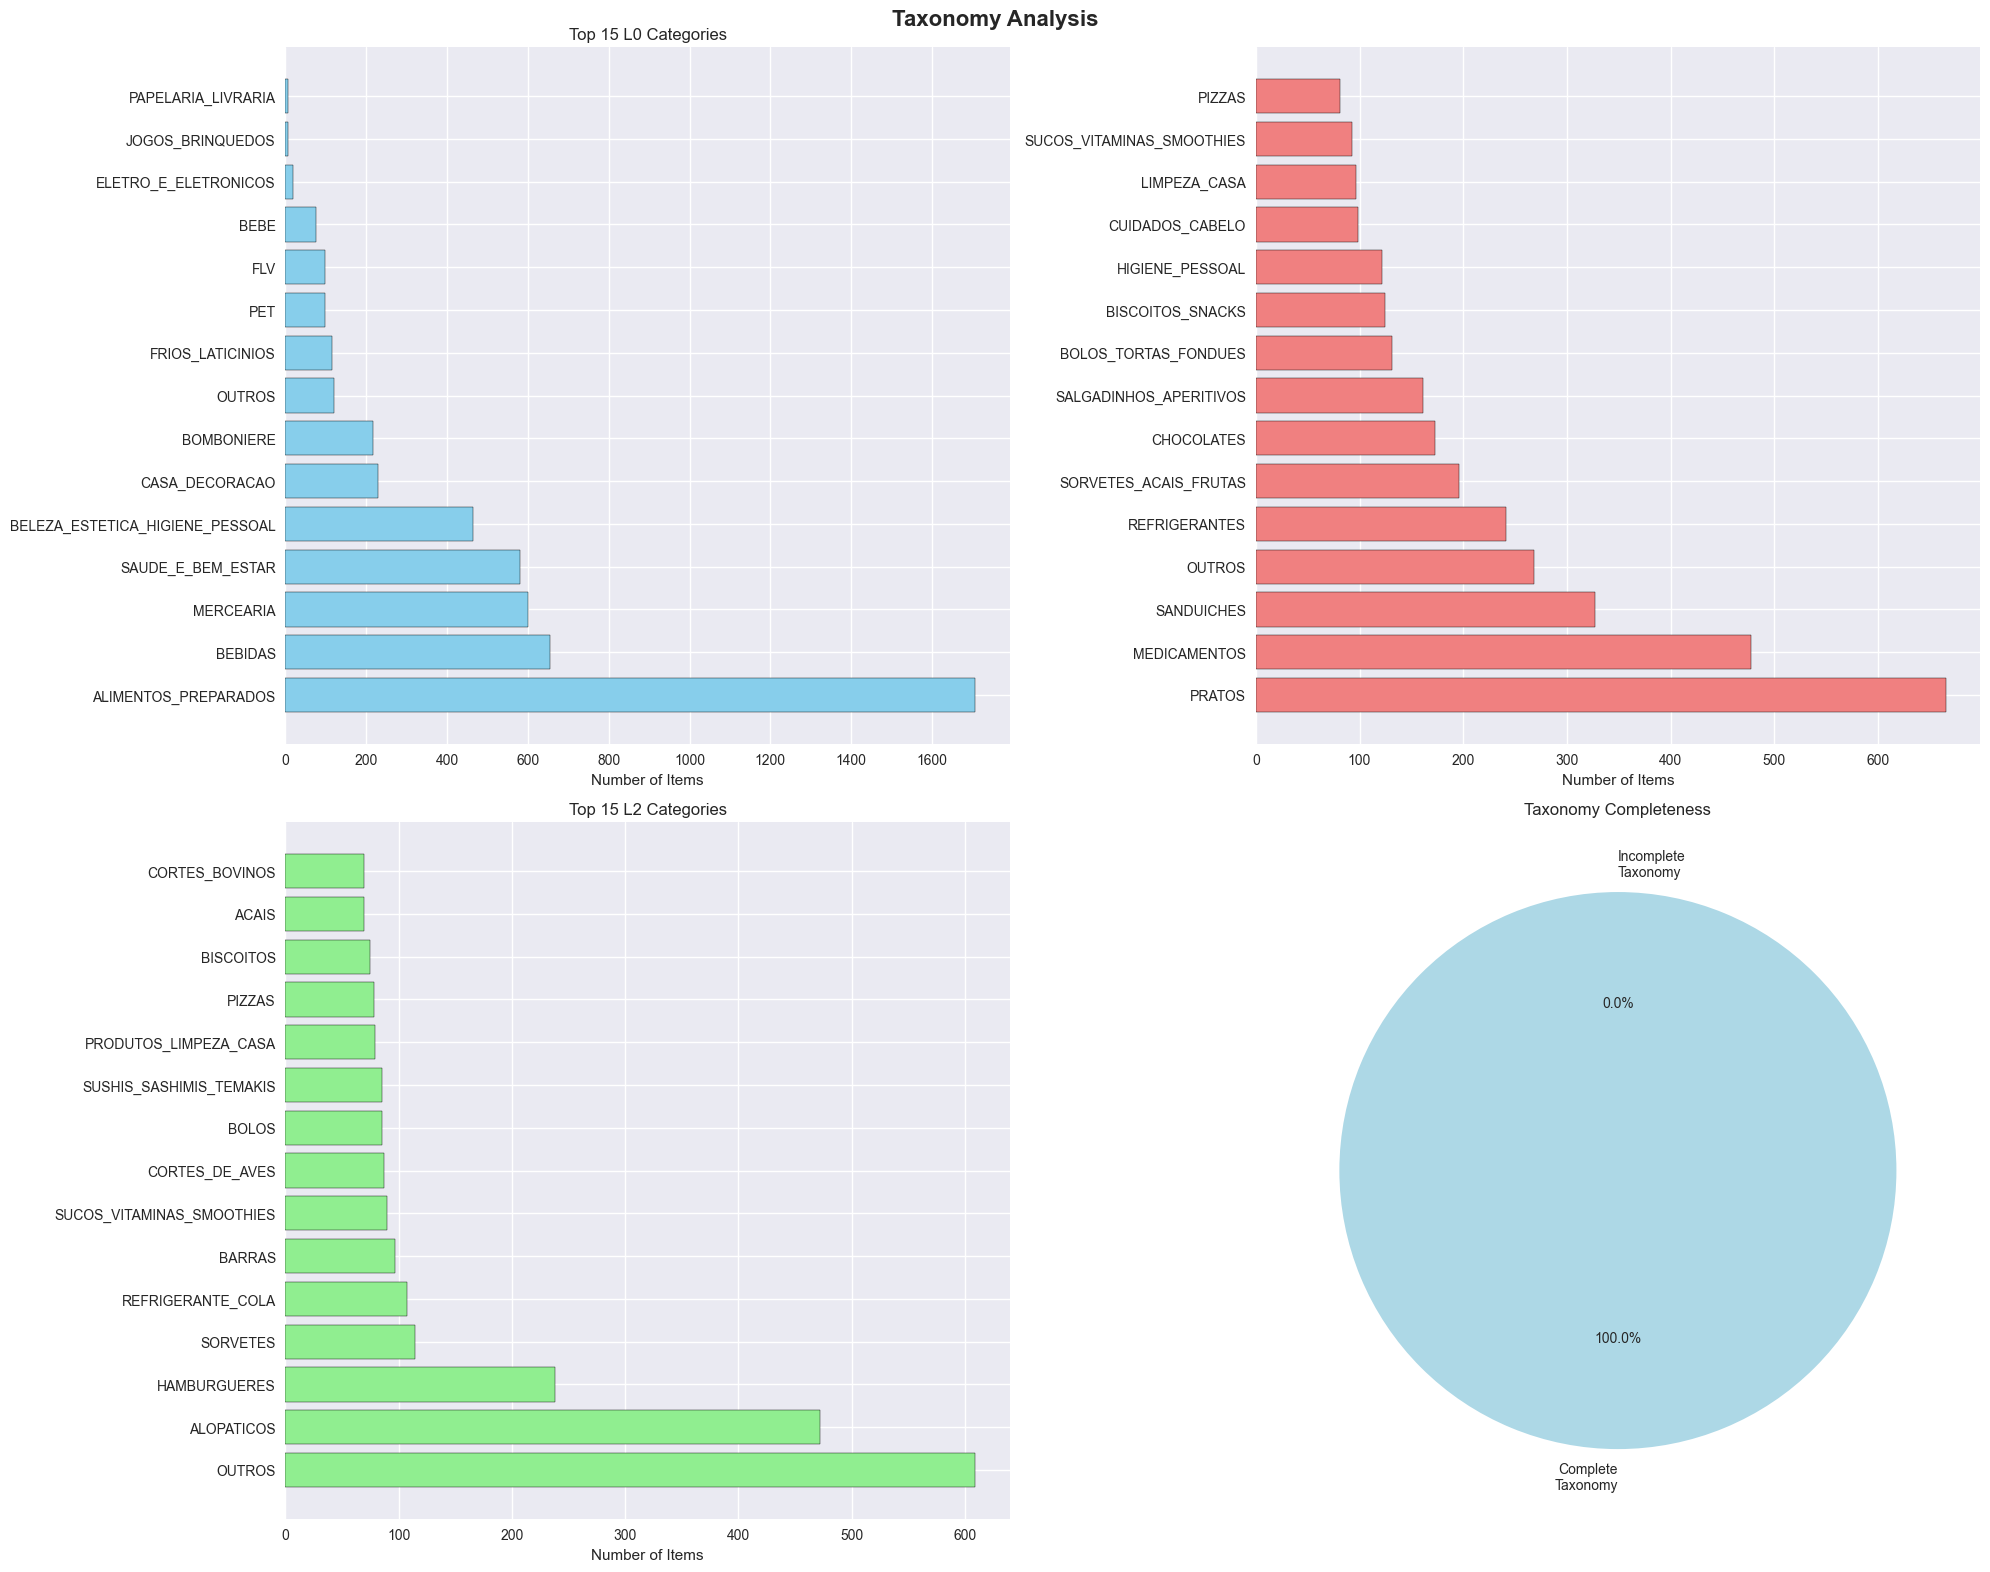


TAXONOMY DEPTH DISTRIBUTION
Items by taxonomy depth:
  3 levels: 5000 items (100.0%)

EXAMPLES OF COMPLETE TAXONOMY PATHS
Item: Macarrão Pena com Ovos Adria 500g
  L0: MERCEARIA
  L1: MASSAS_SECAS
  L2: MASSA_MACARRAO

Item: Goplana Squares Pistache 200g
  L0: OUTROS
  L1: OUTROS
  L2: OUTROS

Item: Creme para Pentear Boom Definição Intensa Seda 350ml
  L0: BELEZA_ESTETICA_HIGIENE_PESSOAL
  L1: CUIDADOS_CABELO
  L2: FINALIZADORES_MODELADORES

Item: Desodorante Invisible For Black & White Aerosol Nivea 200ml Pague 150ml
  L0: BELEZA_ESTETICA_HIGIENE_PESSOAL
  L1: HIGIENE_PESSOAL
  L2: DESODORANTE

Item: Ração Úmida para Cães Filhotes Frango Ao Molho Pedigree 100g
  L0: PET
  L1: RACAO_ALIMENTACAO
  L2: ALIMENTACAO_CAES

Item: Páprica Doce Defumada em Pó Sol Dos Andes 90g
  L0: MERCEARIA
  L1: MOLHOS_CONDIMENTOS
  L2: ERVAS_ESPECIARIAS

Item: Queijo Minas Padrão Fatiado Président 150g
  L0: FRIOS_LATICINIOS
  L1: QUEIJOS
  L2: QUEIJO_MINAS

Item: Arroz Solito 1kg Integral
  L0: MERCEARI

In [6]:
# Load the data
df = pd.read_csv('prosusai_assignment_data/5k_items_curated.csv')

df['itemMetadata_parsed'] = df['itemMetadata'].apply(safe_json_parse)

# Extract taxonomy levels AND name field
df['taxonomy_l0'] = df['itemMetadata_parsed'].apply(lambda x: x.get('taxonomy', {}).get('l0', ''))
df['taxonomy_l1'] = df['itemMetadata_parsed'].apply(lambda x: x.get('taxonomy', {}).get('l1', ''))
df['taxonomy_l2'] = df['itemMetadata_parsed'].apply(lambda x: x.get('taxonomy', {}).get('l2', ''))
df['name'] = df['itemMetadata_parsed'].apply(lambda x: x.get('name', ''))

print(f"\n{'='*80}")
print(f"TAXONOMY ANALYSIS")
print(f"{'='*80}")

# Basic taxonomy statistics
print(f"Total items: {len(df)}")
print(f"Items with L0 taxonomy: {len(df[df['taxonomy_l0'] != ''])}")
print(f"Items with L1 taxonomy: {len(df[df['taxonomy_l1'] != ''])}")
print(f"Items with L2 taxonomy: {len(df[df['taxonomy_l2'] != ''])}")

# L0 (Level 0) Analysis
print(f"\n{'='*50}")
print(f"LEVEL 0 (L0) TAXONOMY ANALYSIS")
print(f"{'='*50}")

l0_counts = df['taxonomy_l0'].value_counts()
print(f"Total L0 categories: {len(l0_counts)}")
print(f"\nTop 15 L0 categories:")
print(f"{'Category':<30} {'Count':<10} {'Percentage':<10}")
print(f"{'='*50}")

for category, count in l0_counts.head(15).items():
    percentage = (count / len(df)) * 100
    print(f"{category:<30} {count:<10} {percentage:.1f}%")

# L1 (Level 1) Analysis
print(f"\n{'='*50}")
print(f"LEVEL 1 (L1) TAXONOMY ANALYSIS")
print(f"{'='*50}")

l1_counts = df['taxonomy_l1'].value_counts()
print(f"Total L1 categories: {len(l1_counts)}")
print(f"\nTop 15 L1 categories:")
print(f"{'Category':<30} {'Count':<10} {'Percentage':<10}")
print(f"{'='*50}")

for category, count in l1_counts.head(15).items():
    percentage = (count / len(df)) * 100
    print(f"{category:<30} {count:<10} {percentage:.1f}%")

# L2 (Level 2) Analysis
print(f"\n{'='*50}")
print(f"LEVEL 2 (L2) TAXONOMY ANALYSIS")
print(f"{'='*50}")

l2_counts = df['taxonomy_l2'].value_counts()
print(f"Total L2 categories: {len(l2_counts)}")
print(f"\nTop 15 L2 categories:")
print(f"{'Category':<30} {'Count':<10} {'Percentage':<10}")
print(f"{'='*50}")

for category, count in l2_counts.head(15).items():
    percentage = (count / len(df)) * 100
    print(f"{category:<30} {count:<10} {percentage:.1f}%")

# Taxonomy hierarchy analysis
print(f"\n{'='*50}")
print(f"TAXONOMY HIERARCHY ANALYSIS")
print(f"{'='*50}")

# Show complete taxonomy paths for top categories
print("Complete taxonomy paths for top 10 L0 categories:")
for l0_category in l0_counts.head(10).index:
    print(f"\nL0: {l0_category}")
    l1_subcategories = df[df['taxonomy_l0'] == l0_category]['taxonomy_l1'].value_counts().head(5)
    for l1_cat, l1_count in l1_subcategories.items():
        print(f"  L1: {l1_cat} ({l1_count} items)")
        l2_subcategories = df[(df['taxonomy_l0'] == l0_category) & (df['taxonomy_l1'] == l1_cat)]['taxonomy_l2'].value_counts().head(3)
        for l2_cat, l2_count in l2_subcategories.items():
            print(f"    L2: {l2_cat} ({l2_count} items)")

# Taxonomy completeness analysis
print(f"\n{'='*50}")
print(f"TAXONOMY COMPLETENESS ANALYSIS")
print(f"{'='*50}")

complete_taxonomy = df[(df['taxonomy_l0'] != '') & (df['taxonomy_l1'] != '') & (df['taxonomy_l2'] != '')]
incomplete_taxonomy = df[~((df['taxonomy_l0'] != '') & (df['taxonomy_l1'] != '') & (df['taxonomy_l2'] != ''))]

print(f"Items with complete taxonomy (L0+L1+L2): {len(complete_taxonomy)} ({len(complete_taxonomy)/len(df)*100:.1f}%)")
print(f"Items with incomplete taxonomy: {len(incomplete_taxonomy)} ({len(incomplete_taxonomy)/len(df)*100:.1f}%)")

# Show items with missing taxonomy
missing_l0 = df[df['taxonomy_l0'] == '']
missing_l1 = df[df['taxonomy_l1'] == '']
missing_l2 = df[df['taxonomy_l2'] == '']

print(f"\nMissing taxonomy breakdown:")
print(f"Missing L0: {len(missing_l0)} items")
print(f"Missing L1: {len(missing_l1)} items")
print(f"Missing L2: {len(missing_l2)} items")

# Create visualizations
print(f"\n{'='*50}")
print(f"CREATING VISUALIZATIONS")
print(f"{'='*50}")

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Taxonomy Analysis', fontsize=16, fontweight='bold')

# 1. L0 distribution (top 15)
top_l0 = l0_counts.head(15)
axes[0,0].barh(range(len(top_l0)), top_l0.values, color='skyblue', edgecolor='black')
axes[0,0].set_yticks(range(len(top_l0)))
axes[0,0].set_yticklabels(top_l0.index)
axes[0,0].set_title('Top 15 L0 Categories')
axes[0,0].set_xlabel('Number of Items')

# 2. L1 distribution (top 15)
top_l1 = l1_counts.head(15)
axes[0,1].barh(range(len(top_l1)), top_l1.values, color='lightcoral', edgecolor='black')
axes[0,1].set_yticks(range(len(top_l1)))
axes[0,1].set_yticklabels(top_l1.index)
axes[0,1].set_xlabel('Number of Items')

# 3. L2 distribution (top 15)
top_l2 = l2_counts.head(15)
axes[1,0].barh(range(len(top_l2)), top_l2.values, color='lightgreen', edgecolor='black')
axes[1,0].set_yticks(range(len(top_l2)))
axes[1,0].set_yticklabels(top_l2.index)
axes[1,0].set_title('Top 15 L2 Categories')
axes[1,0].set_xlabel('Number of Items')

# 4. Taxonomy completeness pie chart
completeness_data = [len(complete_taxonomy), len(incomplete_taxonomy)]
completeness_labels = ['Complete\nTaxonomy', 'Incomplete\nTaxonomy']
axes[1,1].pie(completeness_data, labels=completeness_labels, autopct='%1.1f%%', 
               startangle=90, colors=['lightblue', 'lightcoral'])
axes[1,1].set_title('Taxonomy Completeness')

plt.tight_layout()
plt.show()

# Additional analysis: Taxonomy depth distribution
print(f"\n{'='*50}")
print(f"TAXONOMY DEPTH DISTRIBUTION")
print(f"{'='*50}")

# Count taxonomy levels for each item
df['taxonomy_depth'] = df.apply(lambda row: sum([
    row['taxonomy_l0'] != '',
    row['taxonomy_l1'] != '',
    row['taxonomy_l2'] != ''
]), axis=1)

depth_counts = df['taxonomy_depth'].value_counts().sort_index()
print("Items by taxonomy depth:")
for depth, count in depth_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {depth} levels: {count} items ({percentage:.1f}%)")

# Show some examples of complete taxonomy paths
print(f"\n{'='*50}")
print(f"EXAMPLES OF COMPLETE TAXONOMY PATHS")
print(f"{'='*50}")

complete_examples = complete_taxonomy[['name', 'taxonomy_l0', 'taxonomy_l1', 'taxonomy_l2']].head(10)
for idx, row in complete_examples.iterrows():
    print(f"Item: {row['name']}")
    print(f"  L0: {row['taxonomy_l0']}")
    print(f"  L1: {row['taxonomy_l1']}")
    print(f"  L2: {row['taxonomy_l2']}")
    print()

print("Taxonomy analysis completed!")

# 2. Retrieval System